## Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
#Template https://www.tensorflow.org/tutorials/load_data/images


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
#!unzip 'gdrive/My Drive/CNN Assignment/CNN_assignment.zip' -d 'gdrive/My Drive/CNN Assignment/Images'

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory= data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory= data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


32
32


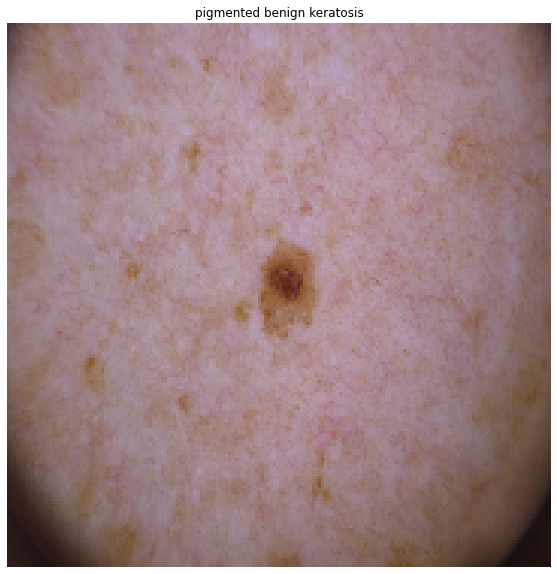

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(class_names[labels[0]])
  plt.axis("off")


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

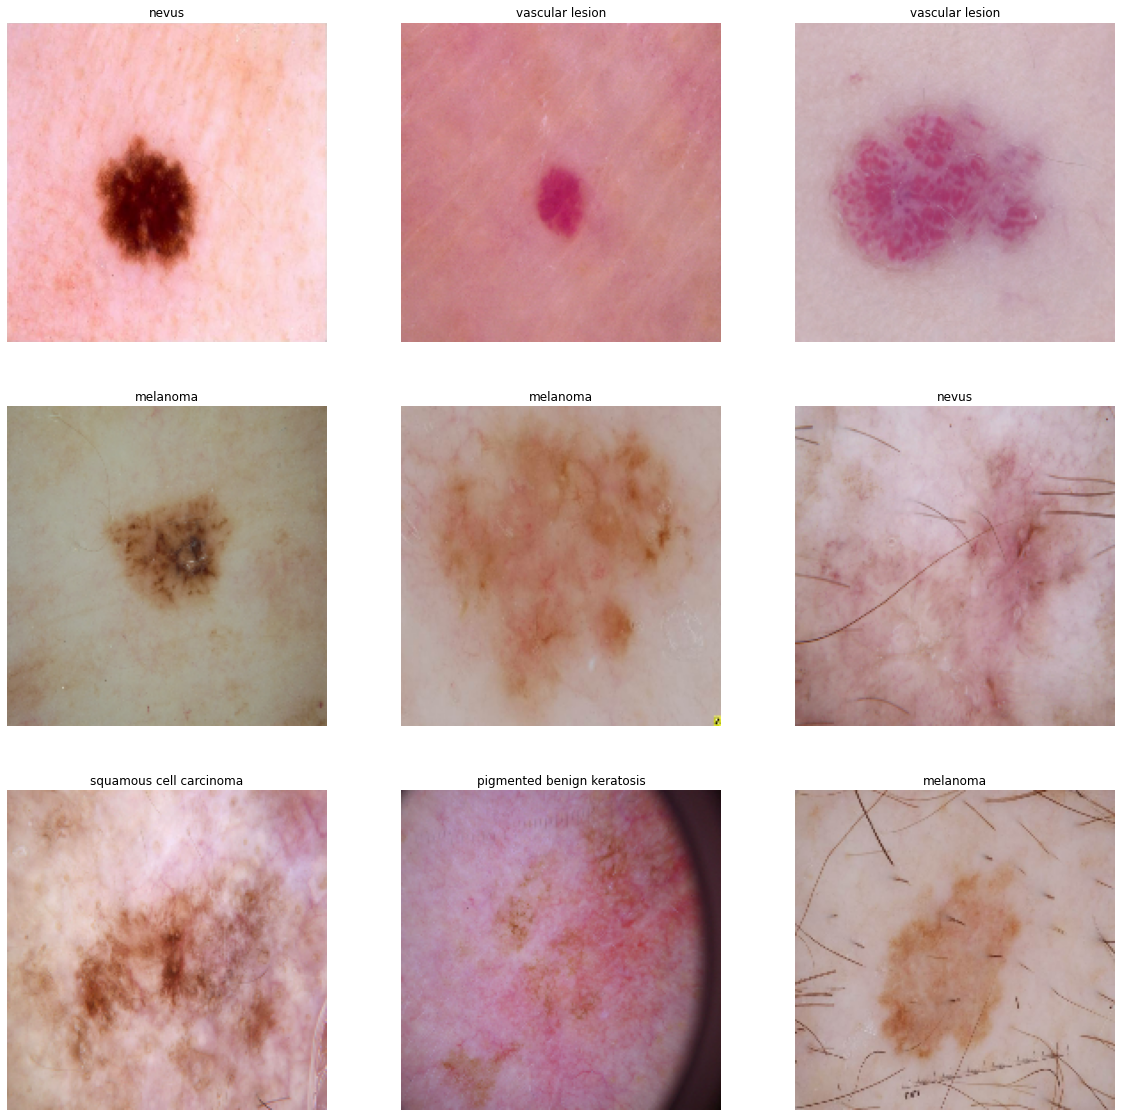

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
print(type(train_ds))
print(len(train_ds))


<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
56


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
num_classes = 9
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #using the maxpool fpr feature map
  layers.MaxPooling2D(), 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #fc layer
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
  
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 234s 968ms/step - loss: 1.8011 - accuracy: 0.3583 - val_loss: 1.5862 - val_accuracy: 0.4586
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 1.5321 - accuracy: 0.4654 - val_loss: 1.4304 - val_accuracy: 0.5101
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3855 - accuracy: 0.5084 - val_loss: 1.5192 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.2933 - accuracy: 0.5385 - val_loss: 1.4489 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 1.2092 - accuracy: 0.5703 - val_loss: 1.3846 - val_accuracy: 0.5503
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 1.0899 - accuracy: 0.6088 - val_loss: 1.3725 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 0.9614 - accuracy: 0.6680 - val_loss: 1.4941 - val_accuracy: 0.5682
Epoch 8/20

### Train the model

### Visualizing training results

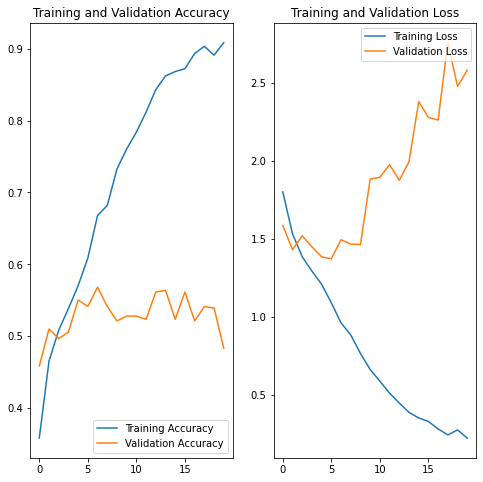

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

Insights: 
1. From Training and Validation accuracy plot we can see upto 58% training and validation data behaves correctly but after that Training accuracy consistently improve where validation accuracy remain more or less near to 55% and at the end it comes down to 48% where as Training accuracy reach 90%. Clearly there is enough evidence that the model does not perform well for validation data where it performs really good for training data. So it is an overfitting scenario.

2. From Training and Validation lost function plot we can clearly see there is huge gap between loss function. for training data the value is 0.22 where as for validation data it is 2.5. Clearly it is an overfitting.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

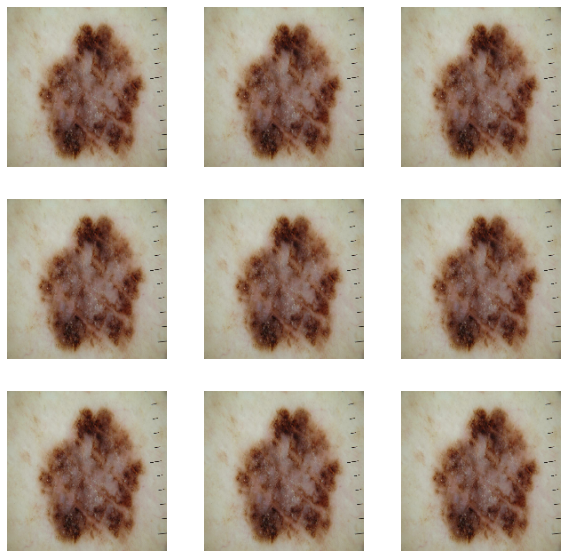

In [ ]:
# visualizing how  augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


### Create the model, compile and train the model


In [ ]:
## introducing dropout layer to overcome overfitting problem

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Train the model with 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 188ms/step - loss: 2.0958 - accuracy: 0.2400 - val_loss: 1.7671 - val_accuracy: 0.3579
Epoch 2/20
56/56 [==============================] - 10s 173ms/step - loss: 1.7391 - accuracy: 0.3477 - val_loss: 1.6872 - val_accuracy: 0.3714
Epoch 3/20
56/56 [==============================] - 10s 173ms/step - loss: 1.6372 - accuracy: 0.3895 - val_loss: 1.6428 - val_accuracy: 0.3669
Epoch 4/20
56/56 [==============================] - 10s 173ms/step - loss: 1.6093 - accuracy: 0.3856 - val_loss: 1.5593 - val_accuracy: 0.4273
Epoch 5/20
56/56 [==============================] - 10s 172ms/step - loss: 1.6013 - accuracy: 0.3973 - val_loss: 1.5378 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 10s 172ms/step - loss: 1.5376 - accuracy: 0.4308 - val_loss: 1.6135 - val_accuracy: 0.3870
Epoch 7/20
56/56 [==============================] - 10s 172ms/step - loss: 1.5919 - accuracy: 0.4012 - val_loss: 1.7377 - val_accuracy: 0.3311

### Visualizing the results

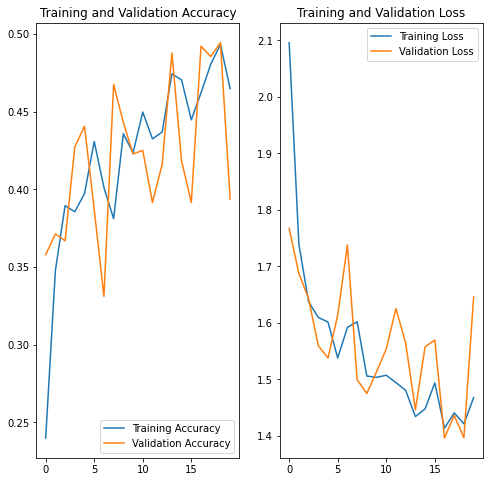

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join('gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
val_dir = os.path.join('gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224 


image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
#Create a CNN model
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens the input. Does not affect the batch size.
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=10
)


Epoch 1/10
23/23 [==============================] - 117s 5s/step - loss: 2.5398 - accuracy: 0.1925 - val_loss: 2.2421 - val_accuracy: 0.1356
Epoch 2/10
23/23 [==============================] - 73s 3s/step - loss: 1.9398 - accuracy: 0.2568 - val_loss: 2.5313 - val_accuracy: 0.1441
Epoch 3/10
23/23 [==============================] - 74s 3s/step - loss: 1.8114 - accuracy: 0.3439 - val_loss: 2.1663 - val_accuracy: 0.2203
Epoch 4/10
23/23 [==============================] - 73s 3s/step - loss: 1.6434 - accuracy: 0.4109 - val_loss: 2.1416 - val_accuracy: 0.2542
Epoch 5/10
23/23 [==============================] - 73s 3s/step - loss: 1.5109 - accuracy: 0.4569 - val_loss: 2.3871 - val_accuracy: 0.2797
Epoch 6/10
23/23 [==============================] - 72s 3s/step - loss: 1.4975 - accuracy: 0.4645 - val_loss: 2.0569 - val_accuracy: 0.3220
Epoch 7/10
23/23 [==============================] - 72s 3s/step - loss: 1.3997 - accuracy: 0.5127 - val_loss: 2.3685 - val_accuracy: 0.3390
Epoch 8/10
23/23 [=

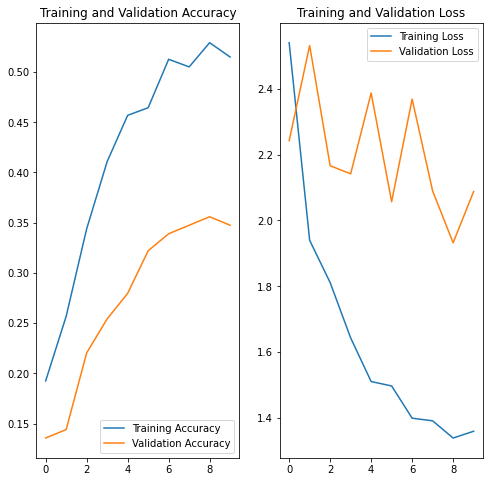

In [ ]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Insights:
1. From Training and Validation accuracy plot we can see the pattern looks similar for both the case but there is still a huge gap between training and validation accuracy value.Training accuracy comes down to 51% and test accuracy 34%. In previous case the training and test accuracy was higher than this time but overfitting was high. In this case though the accuracy values reduce but we can able to reduce the overfitting tendency in the model which is good sign.

2. For Training and Validation loss, we can see same tendency. We have reduced some overfitting problem but Trainning loss is 1.36 where as validation loss is 2.08 so still overfittig exists.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/My Drive/CNN Assignment/Images/Skin can...,actinic keratosis
1,gdrive/My Drive/CNN Assignment/Images/Skin can...,actinic keratosis
2,gdrive/My Drive/CNN Assignment/Images/Skin can...,actinic keratosis
3,gdrive/My Drive/CNN Assignment/Images/Skin can...,actinic keratosis
4,gdrive/My Drive/CNN Assignment/Images/Skin can...,actinic keratosis
...,...,...
2234,gdrive/My Drive/CNN Assignment/Images/Skin can...,vascular lesion
2235,gdrive/My Drive/CNN Assignment/Images/Skin can...,vascular lesion
2236,gdrive/My Drive/CNN Assignment/Images/Skin can...,vascular lesion
2237,gdrive/My Drive/CNN Assignment/Images/Skin can...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


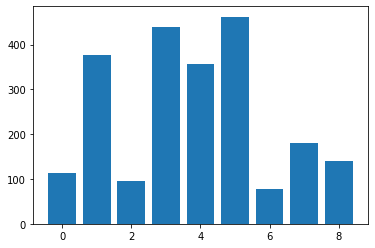

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
X, y = original_df['Path'], original_df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Insights:
#### - Which class has the least number of samples?
Ans: Class 6 i.e seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Ans: Class 5 i.e. pigmented benign keratosis has major number of samples



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
#!pip install Augmentor

In [ ]:
import Augmentor
#datapath = 'gdrive/My Drive/CNN Assignment/Augmented Image/'
datapath = 'gdrive/My Drive/CNN Assignment/Augmented Image/Train/'
p = Augmentor.Pipeline(datapath)
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.sample(150)
p.process()


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Augmented Image/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2269x1965 at 0x7F0F34FD5C50>: 100%|██████████| 150/150 [00:16<00:00,  9.23 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F38907810>: 100%|██████████| 2249/2249 [04:26<00:00,  8.43 Samples/s]


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F371C8190>: 100%|██████████| 500/500 [00:22<00:00, 22.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0FE1D53450>: 100%|██████████| 500/500 [00:22<00:00, 22.34 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0F37D37390>: 100%|██████████| 500/500 [00:22<00:00, 22.70 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F0F37E0CF50>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F0F370D3C90>: 100%|██████████| 500/500 [01:31<00:00,  5.46 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F37BA3690>: 100%|██████████| 500/500 [00:21<00:00, 23.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F38AC0050>: 100%|██████████| 500/500 [00:47<00:00, 10.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F37BA9ED0>: 100%|██████████| 500/500 [00:21<00:00, 23.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F37236310>: 100%|██████████| 500/500 [00:21<00:00, 23.06 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_b23d82b0-6afa-4205-bc4b-007b37c31e65.jpg',
 'gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_9ac5cf67-b7ad-4203-b48e-07b8a4a9df95.jpg',
 'gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029309.jpg_1f0171ce-b11b-40dd-82a8-7aad83d12f93.jpg',
 'gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031292.jpg_f7623a85-9bc6-445f-9e84-213fe0bea07c.jpg',
 'gdrive/My Drive/CNN Assignment/Images/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic kera

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
54/54 [==============================] - 45s 277ms/step - loss: 2.0857 - accuracy: 0.1990 - val_loss: 1.7359 - val_accuracy: 0.3549
Epoch 2/20
54/54 [==============================] - 7s 121ms/step - loss: 1.5447 - accuracy: 0.4214 - val_loss: 1.4854 - val_accuracy: 0.4662
Epoch 3/20
54/54 [==============================] - 7s 122ms/step - loss: 1.3000 - accuracy: 0.5121 - val_loss: 1.2898 - val_accuracy: 0.5316
Epoch 4/20
54/54 [==============================] - 7s 122ms/step - loss: 1.1572 - accuracy: 0.5820 - val_loss: 1.1621 - val_accuracy: 0.5791
Epoch 5/20
54/54 [==============================] - 7s 121ms/step - loss: 0.9682 - accuracy: 0.6580 - val_loss: 1.0580 - val_accuracy: 0.5947
Epoch 6/20
54/54 [==============================] - 7s 121ms/step - loss: 0.8534 - accuracy: 0.6936 - val_loss: 0.9756 - val_accuracy: 0.6518
Epoch 7/20
54/54 [==============================] - 7s 121ms/step - loss: 0.7511 - accuracy: 0.7307 - val_loss: 0.8592 - val_accuracy: 0.7016
Epoch

#### **Todo:**  Visualize the model results

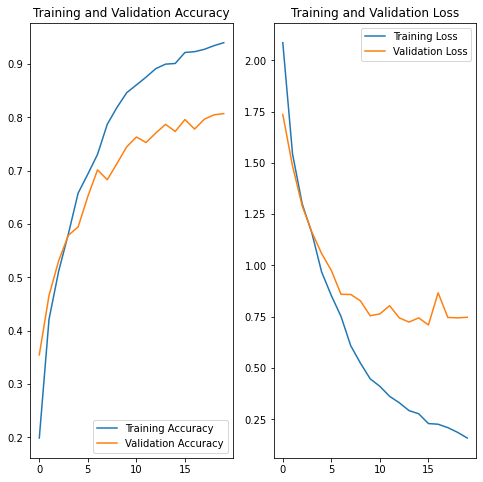

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Final Insights:
1. We can see after addressing overfitting and class imbalance problem we get much better version of model. The new model 94% training accuracy and 80% of validation accuracy.

2. From Training and Validation accuracy plot, we can conclude the the model performance significantly improve. Both Training and validation plot follow same pattern. the new model training accuracy is 94% and validation accuracy 80%. Still overfitting exists but compare to previous model it improves a lot.

3. From Training and validation loss plot we can conclude overfitting still exists. Training loss is 0.15 and validation loss is 0.74. Though from previous model it significantlly improves.
